In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

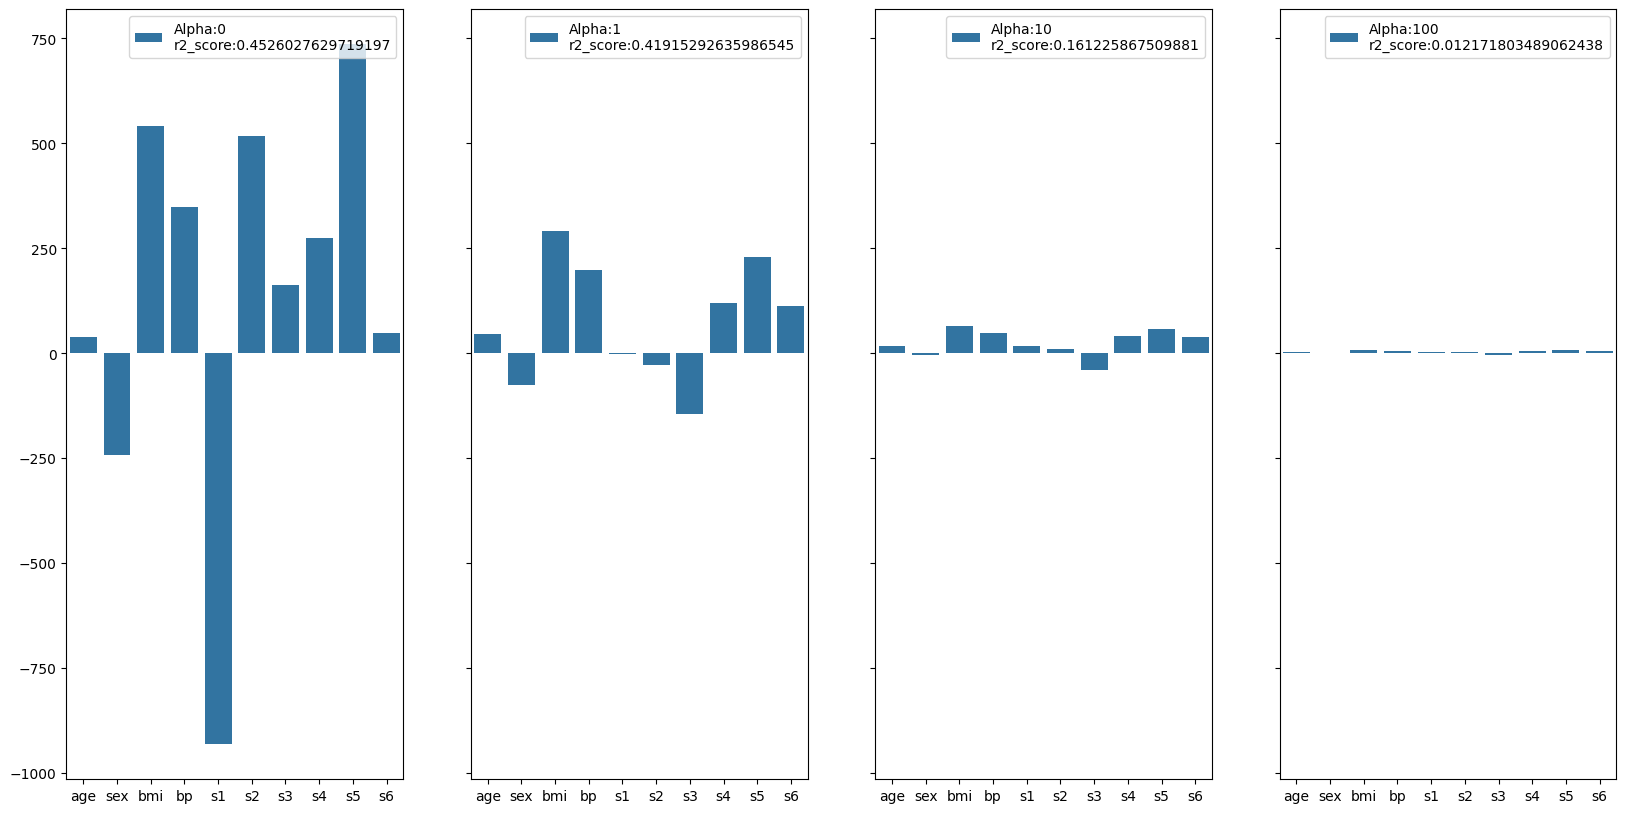

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alphas = [0,1,10,100]
coef_list = []
r2_score_list = []

for alpha in alphas:
    ri = Ridge(alpha=alpha)
    ri.fit(X_train, y_train)
    coef_list.append(ri.coef_)
    y_pred = ri.predict(X_test)
    r2_score_list.append(r2_score(y_test, y_pred))

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,10), sharey=True)
for i in range(len(alphas)):
    sns.barplot(x=data.feature_names, y=coef_list[i], ax=ax[i], label=f'Alpha:{alphas[i]}\nr2_score:{r2_score_list[i]}')

In [6]:
temp = pd.DataFrame(coef_list, columns=data.feature_names)
temp['Alpha'] = alphas
temp = temp.set_index('Alpha')
temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Alpha,,,,,,,,,,
0,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
1,45.367377,-76.666086,291.338832,198.995817,-0.530310,-28.577050,-144.511905,119.260066,230.221608,112.149830
10,18.229623,-3.277536,65.128417,48.219668,16.238315,10.861055,-39.208913,41.438568,57.950124,39.359401
100,2.414573,0.036315,7.689592,5.786517,2.488549,1.902019,-4.832511,5.397252,7.072654,5.030673


In [7]:
temp_shifted = temp.shift(periods=1, axis=0)
temp_shifted.iloc[0,:] = 0
diff = temp - temp_shifted
diff

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Alpha,,,,,,,,,,
0,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
1,7.463356,165.298277,-251.089927,-148.708026,930.958536,-546.639327,-307.931888,-156.057836,-505.977251,63.479173
10,-27.137755,73.388550,-226.210415,-150.776150,16.768625,39.438104,105.302992,-77.821497,-172.271484,-72.790429
100,-15.815049,3.313851,-57.438825,-42.433150,-13.749766,-8.959036,34.376402,-36.041317,-50.877470,-34.328728


In [8]:
alphas, coef_list

([0, 1, 10, 100],
 [array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
         -931.48884588,  518.06227698,  163.41998299,  275.31790158,
          736.1988589 ,   48.67065743]),
  array([  45.36737726,  -76.66608563,  291.33883165,  198.99581745,
           -0.53030959,  -28.57704987, -144.51190505,  119.26006559,
          230.22160832,  112.14983004]),
  array([ 18.22962257,  -3.27753564,  65.12841688,  48.21966755,
          16.23831513,  10.86105458, -39.20891284,  41.43856828,
          57.95012433,  39.35940115]),
  array([ 2.41457328,  0.03631503,  7.68959184,  5.78651722,  2.48854891,
          1.90201877, -4.83251122,  5.39725175,  7.07265406,  5.0306732 ])])

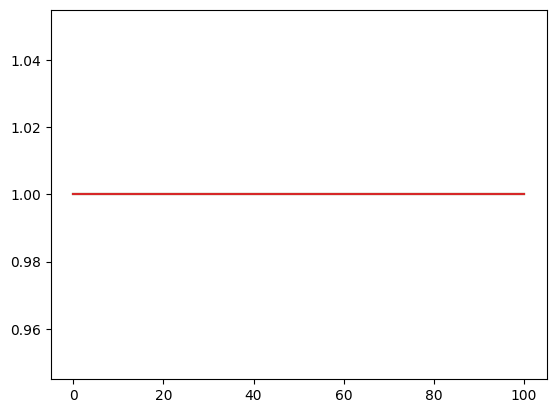

In [9]:
for alpha in range(len(alphas)):
    coefs = []
    for i in coef_list:
        coefs.append(coef_list[
    sns.lineplot(x=alphas, y=coefs)